In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [2]:
df = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/RocketLaunchDataCompleted.csv', encoding='cp949')
df.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

#### 결측치 확인

In [4]:
# ------------
# 결측치 비율
# ------------
df.isnull().mean().sort_values(ascending=False)

Hist Ave Sea Level Pressure     1.000000
Hist Ave Visibility             1.000000
Hist Ave Max Wind Speed         1.000000
Notes                           0.990000
Temp at Launch Time             0.803333
Wind Speed at Launch Time       0.803333
Time (East Coast)               0.803333
Launched?                       0.800000
Crewed or Uncrewed              0.800000
Name                            0.800000
Condition                       0.006667
Day Length                      0.006667
Visibility                      0.003333
Ave Temp                        0.003333
Low Temp                        0.003333
Max Wind Speed                  0.003333
High Temp                       0.003333
Hist High Temp                  0.003333
Percipitation at Launch Time    0.003333
Hist Ave Temp                   0.003333
Wind Direction                  0.003333
Hist Ave Percipitation          0.003333
Hist Low Temp                   0.003333
Sea Level Pressure              0.003333
Location        

In [5]:
# !pip install missingno

- missingno 라이브러리

    **결측값(Missing Values)**을 시각화하고 **탐색적 데이터 분석(EDA)**을 돕는 데 특화된 도구

🔍 주요 기능

1. 결측값 패턴 시각화: 데이터셋의 어느 위치에, 어느 정도의 결측값이 존재하는지 빠르고 직관적으로 파악할 수 있도록 다양한 플롯(plot)을 제공

    - Matrix Plot: 데이터의 완성도를 행렬 형태로 시각화하여, 개별 행(row)과 열(column)에서 결측값의 패턴을 한눈에 볼 수 있음

    - Bar Plot: 각 열(feature)별 결측값의 비율 또는 개수를 막대 그래프로 보여줌

    - Heatmap: 두 변수 간 **결측값 발생의 상관관계(nullity correlation)**를 히트맵으로 표시하여,   
        특정 열에 결측값이 있을 때 다른 열에도 결측값이 발생할 가능성이 높은지 등을 알 수 있게 함

    - Dendrogram: 계층적 클러스터링을 사용하여 결측값 패턴이 비슷한 변수들을 그룹화하여 보여줌

2. 결측값 처리 결정 지원: 시각화를 통해 얻은 통찰력은 결측값을 제거, 대체 등 결측값 처리 방법을 더 합리적으로 결정하는 데 도움을 줌

<Axes: >

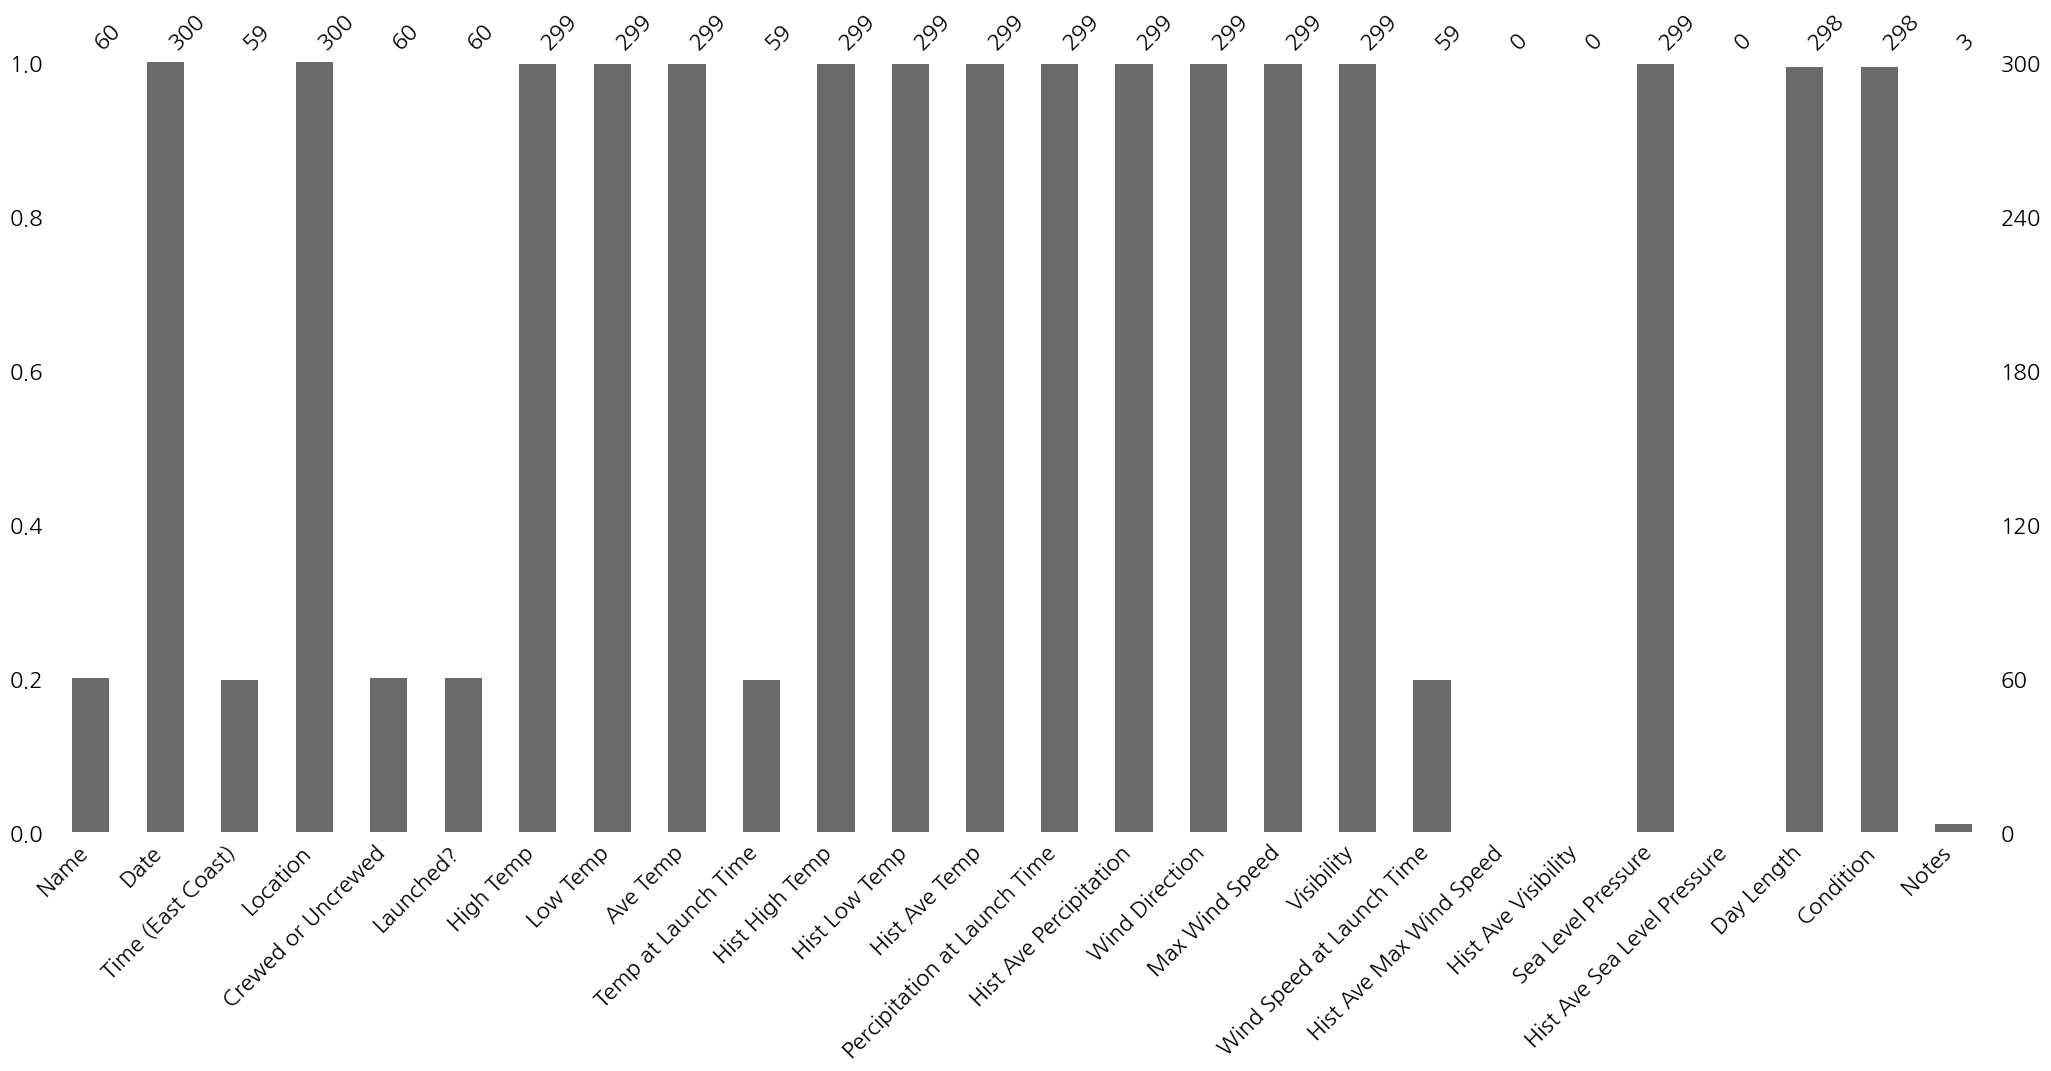

In [6]:
# ------------
# 결측치 시각화
# ------------
import missingno
plt.figure(figsize=(10,4))
missingno.bar(df)

**missingno bar( ) 함수**

데이터프레임 df의 각 열(변수)에 대해 결측치가 없는 데이터의 수를 전체 데이터의 수와 비교하여 보여줌

- Y축: 일반적으로 데이터의 완성도(Data Completeness), 즉 결측치가 아닌 값들의 비율($0.0$부터 $1.0$까지)을 나타냄

- 막대의 높이: 각 열에 실제 값이 채워져 있는 비율을 나타냄  
막대가 $1.0$에 가까울수록 해당 열은 데이터가 거의 모두 채워져 있다는 의미

- 막대의 빈 공간: 막대의 높이가 $1.0$에서 부족한 만큼이 바로 결측값의 비율을 시각적으로 나타냄

### 결측치 처리

#### 결측치 채우기

In [7]:
# 'Crewed or Uncrewed', 'Launched?', 'Wind Direction', 'Condition' 열의 결측치 비율 출력
df[['Crewed or Uncrewed', 'Launched?', 'Wind Direction', 'Condition']].isnull().mean()

Crewed or Uncrewed    0.800000
Launched?             0.800000
Wind Direction        0.003333
Condition             0.006667
dtype: float64

In [8]:
# ----------------------------------------------------------------------
#   * 특정 컬럼만 지정해서 채움 *
#   Crewed or Uncrewed  -> Uncrewed
#   Launched?           -> N
#   Wind Direction      -> Unknown
#   Condition           -> Fail
# ----------------------------------------------------------------------
fill_cols = {
    'Crewed or Uncrewed':'Uncrewed',
    'Launched?':'N',
    'Wind Direction':'Unknown',
    'Condition':'Fail'
}

df = df.fillna(fill_cols)

In [9]:
# 'Crewed or Uncrewed', 'Launched?', 'Wind Direction', 'Condition' 열의 결측치 비율 출력
df[['Crewed or Uncrewed', 'Launched?', 'Wind Direction', 'Condition']].isnull().mean()

Crewed or Uncrewed    0.0
Launched?             0.0
Wind Direction        0.0
Condition             0.0
dtype: float64

#### 사용하지 않을 컬럼 삭제

In [10]:
# 전체 컬럼명 출력
df.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [11]:
# ----------------------------------------------------------------------
# 전체 누락
#    -  Hist Ave Sea Level Pressure, Hist Ave Visibility, Hist Ave Max Wind Speed
# 관련도 낮음        
#    - Name, Date, Time (East Coast), Location
#    - Day Length, Notes, Sea Level Pressure
# ----------------------------------------------------------------------
drop_cols = ['Hist Ave Sea Level Pressure', 
            'Hist Ave Visibility', 
            'Hist Ave Max Wind Speed',
            'Name',
            'Date',
            'Time (East Coast)',
            'Location',
            'Day Length',
            'Notes',
            'Sea Level Pressure']

df = df.drop(drop_cols, axis=1)     # 열(컬럼) 삭제

In [12]:
# 전체 컬럼명 출력
df.columns

Index(['Crewed or Uncrewed', 'Launched?', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

#### 결측치 채우기

In [13]:
# ----------------------------------------------------------------------
#   Crewed or Uncrewed  -> Uncrewed
#   Launched?           -> N
#   Wind Direction      -> Unknown
#   Condition           -> Fail
# ----------------------------------------------------------------------
fill_cols = {
    'Crewed or Uncrewed':'Uncrewed',
    'Launched?':'N',
    'Wind Direction':'Unknown',
    'Condition':'Fail'
}
df = df.fillna(fill_cols)

### 결측치 삭제

In [14]:
# 결측치가 70% 이상인 컬럼 출력
df.loc[:, df.isnull().mean()>0.7].columns

Index(['Temp at Launch Time', 'Wind Speed at Launch Time'], dtype='object')

In [15]:
# -----------------
# 결측치가 70% 이상인 컬럼 삭제
# -----------------
del_cols = df.loc[:, df.isnull().mean()>0.7].columns
df = df.drop(del_cols, axis=1)

In [16]:
# 결측치가 70% 이상인 컬럼 출력
df.loc[:, df.isnull().mean()>0.7].columns

Index([], dtype='object')

In [17]:
# 누락값(결측치, NaN)이 하나라도 있는 열의 이름 출력
df.columns[df.isnull().any()]

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Max Wind Speed', 'Visibility'],
      dtype='object')

In [18]:
# ----------------------------------------------------------------------
#   그 외 누락값         -> 0
# ----------------------------------------------------------------------
df = df.fillna(0)

In [19]:
# 누락값(결측치, NaN)이 하나라도 있는 열의 이름 출력
df.columns[df.isnull().any()]

Index([], dtype='object')

### 타겟 인코딩

In [20]:
df['target'] = df['Launched?'].map({"Y":1, "N":0})

### 변수 유형

In [21]:
cat_cols = df.select_dtypes(include='object').drop(['Launched?'],axis=1).columns    # 범주형 변수 선택
num_cols = df.select_dtypes(include='number').drop(['target'],axis=1).columns       # 숫자형 변수 선택

- cat_cols는 타겟 인코딩이 필요한 다른 범주형 특성들의 리스트를 담고 있음
- num_cols는 스케일링(Scaling) 등의 전처리가 필요할 수 있는 숫자형 특성들의 리스트를 담고 있음

### 범주형 변수 

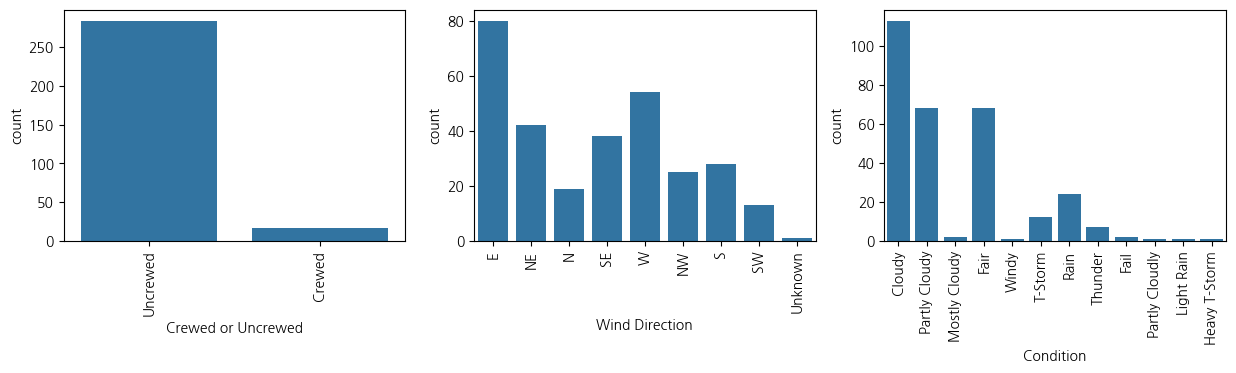

In [22]:
# ---------------------
# 빈도수
# ---------------------
fig, ax = plt.subplots(1,3,figsize=(15,3))
axes=ax.flatten()
for i, feature in enumerate(cat_cols):
    sns.countplot(x=feature,data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)

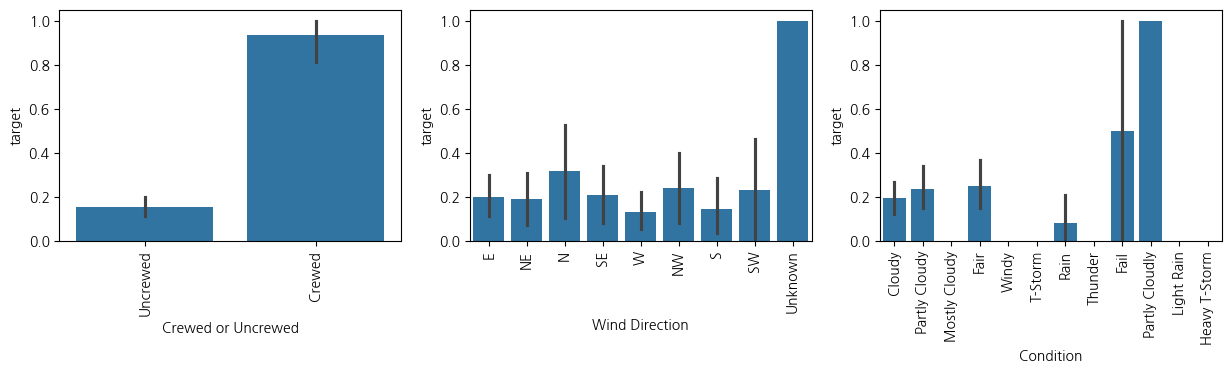

In [23]:
# ---------------------
# 성공률 (범주형 변수(cat_cols) 각각에 대해 타겟 변수('Launched?')와의 관계)
# ---------------------
fig, ax = plt.subplots(1,3,figsize=(15,3))
axes=ax.flatten()
for i, feature in enumerate(cat_cols):
    sns.barplot(x=feature, y='target', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)  # X축의 카테고리 이름이 길어 겹치지 않도록 X축 레이블을 90도 회전

- barplot은 기본적으로 X축 카테고리별 Y축 값들의 평균을 계산하여 막대의 높이로 표현 (성공률(평균 타겟 값) 계산)

### 수치형 변수

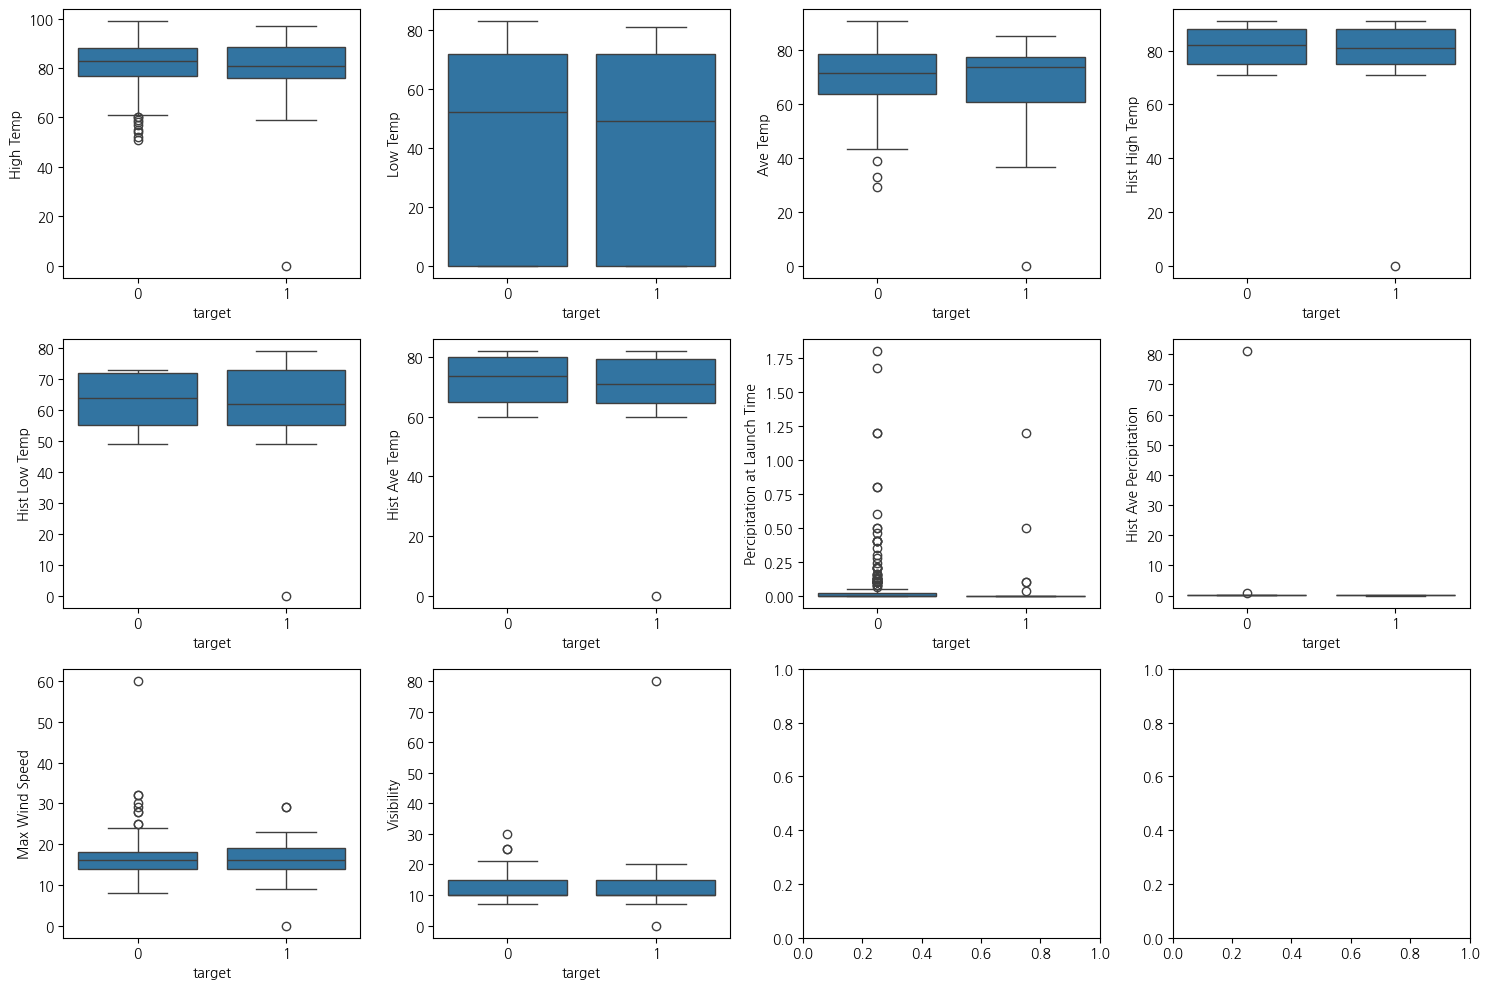

In [24]:
fig, ax = plt.subplots(3,4,figsize=(15,10))
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
plt.tight_layout()

### 정제된 데이터 다운로드

In [25]:
df.to_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/RocketLaunchDataCompleted2.csv', index=False)